**SISTEM PREDIKSI DIABETES**

# Import LIBRARY

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Import data

In [4]:
df= pd.read_csv('diabetes.csv')

# Data understanding

## Sumber data

[SUMBER DATA](https://www.kaggle.com/code/paultimothymooney/predict-diabetes-from-medical-records)

## DESKRIPSI DATA

Pregnancies: Jumlah kehamilan yang pernah dialami oleh seorang individu. Variabel ini merupakan data numerik dan mencerminkan faktor riwayat kehamilan, yang dapat memengaruhi risiko diabetes.

Glucose: Kadar glukosa plasma pada saat tes toleransi glukosa dua jam dalam satuan mg/dL. Kadar glukosa yang tinggi merupakan indikator utama diabetes.

BloodPressure: Tekanan darah diastolik dalam satuan mm Hg. Tekanan darah tinggi dapat berhubungan dengan peningkatan risiko diabetes.

SkinThickness: Ketebalan lipatan kulit triceps dalam satuan milimeter (mm). Ini mengukur kadar lemak subkutan dan sering digunakan sebagai indikator lemak tubuh.

Insulin: Kadar insulin serum dua jam dalam satuan µU/mL. Insulin yang tinggi bisa menunjukkan resistensi insulin, yang merupakan tanda diabetes.

BMI: Body Mass Index atau indeks massa tubuh yang diukur dari berat badan dalam kg/m². BMI tinggi berhubungan dengan risiko lebih tinggi untuk diabetes.

DiabetesPedigreeFunction: Skor silsilah keluarga terkait diabetes. Nilai ini menunjukkan risiko diabetes berdasarkan riwayat keluarga.

Age: Usia individu dalam tahun. Usia yang lebih tua bisa meningkatkan risiko diabetes.

Outcome: Status diabetes, yang bersifat biner (0 atau 1). Nilai 1 menunjukkan individu terdiagnosis diabetes, sementara nilai 0 menunjukkan tidak terdiagnosis diabetes.

## nama kolumn

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 5 kolom teratas

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## statistik data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## type data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## diemensi data

In [ ]:
df.shape

(768, 9)

## missing value

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## data unique

In [ ]:
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


## Duplicated data

In [ ]:
df.duplicated().sum()

0

## nilai unik di Outcome.

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> tidak Diabetes

1 --> Diabetes

## outlier

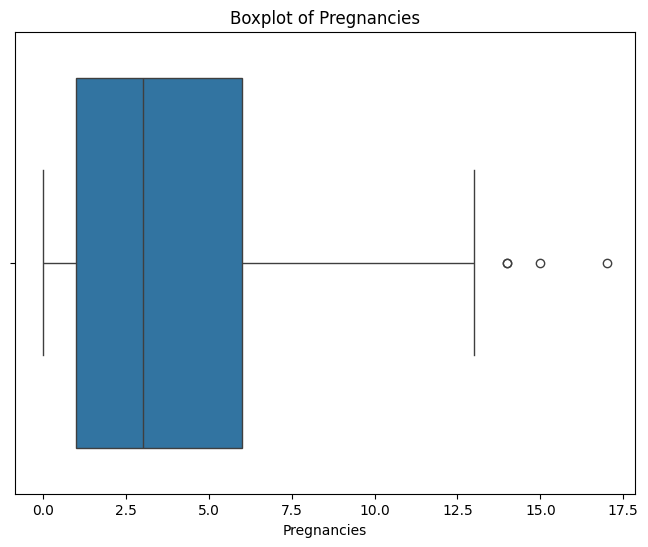

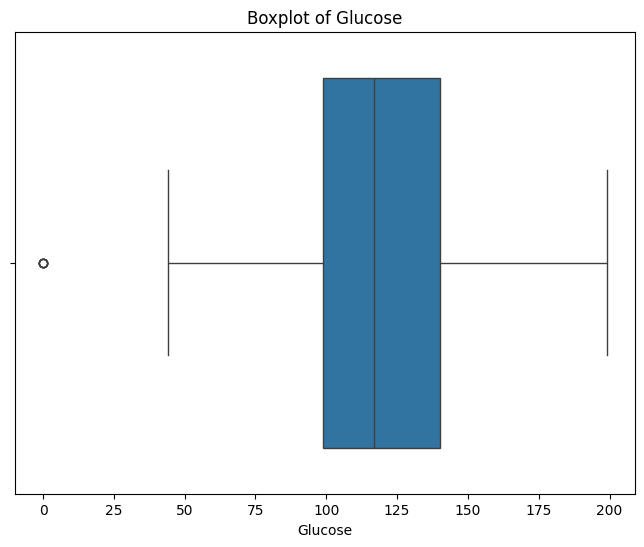

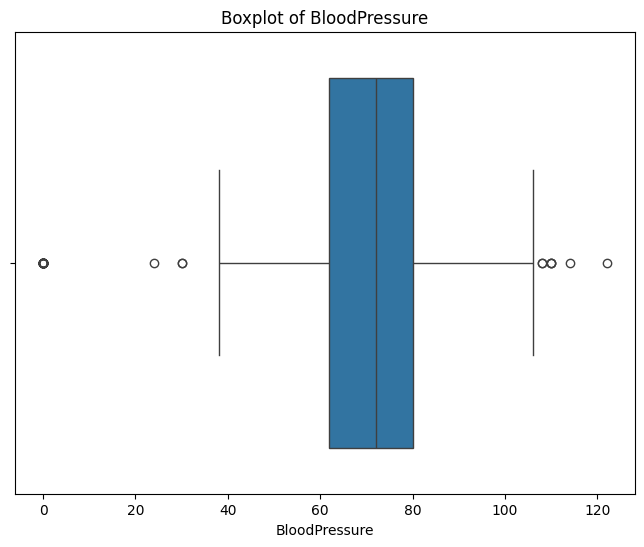

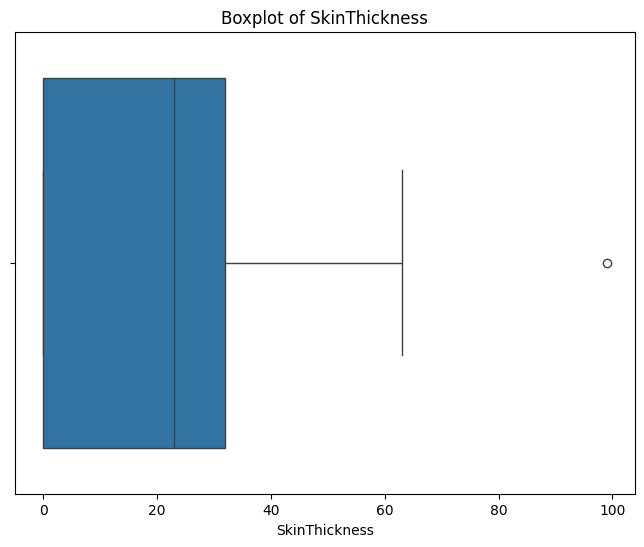

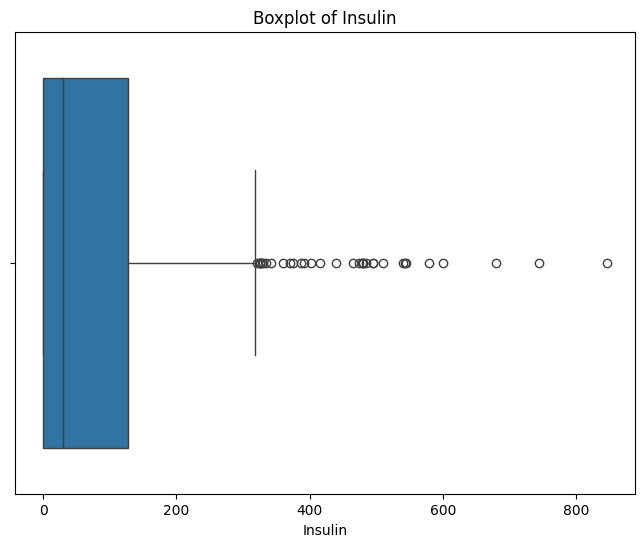

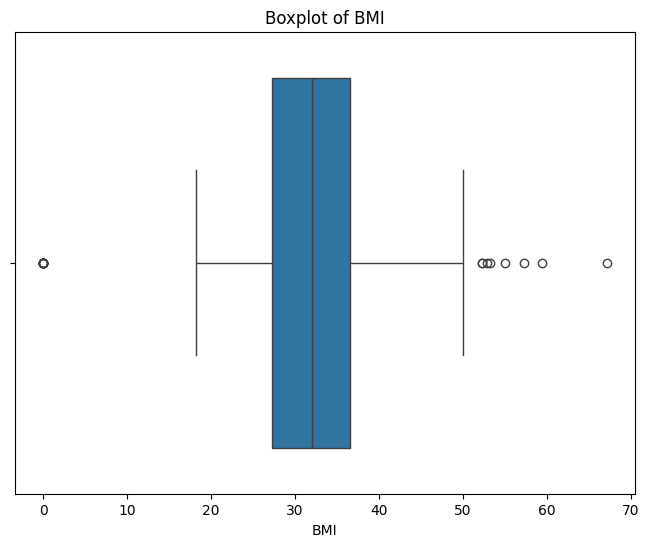

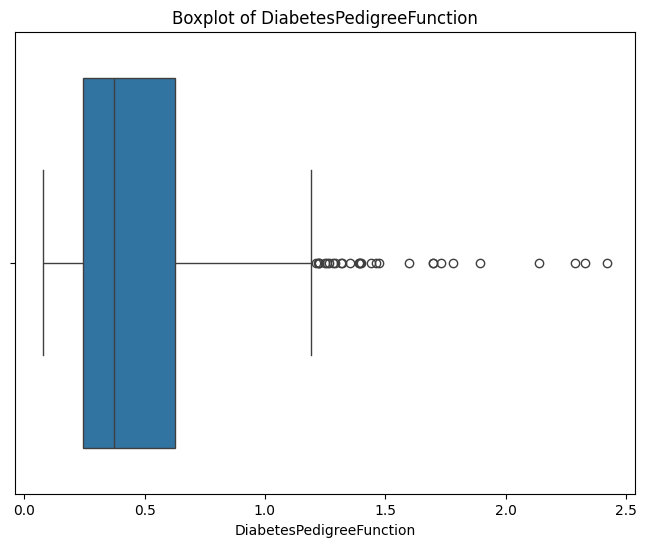

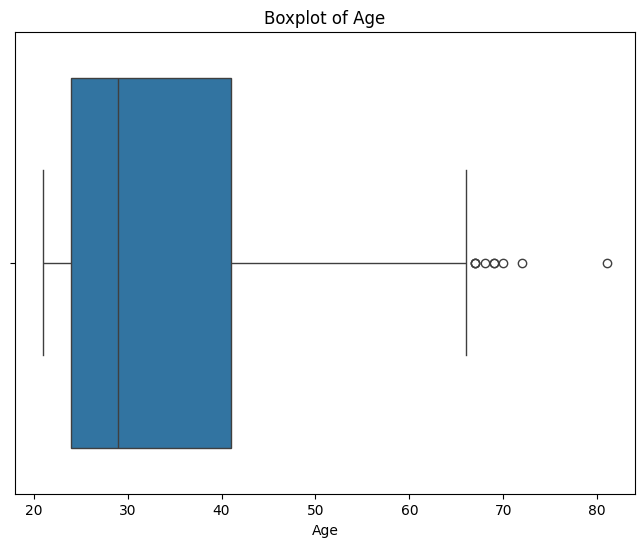

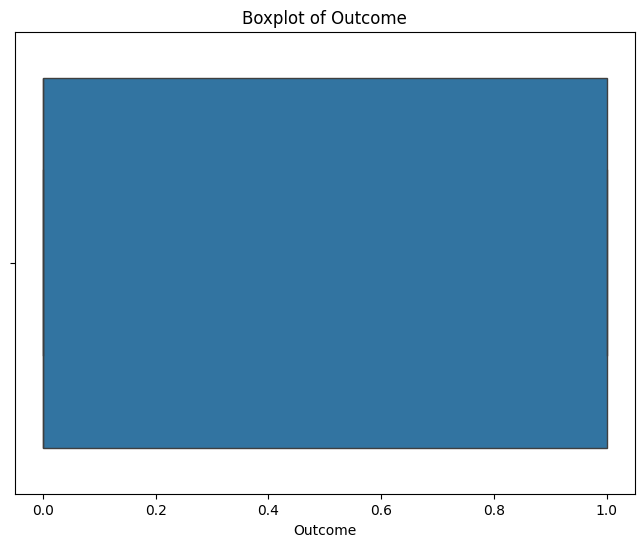

In [ ]:
num = df.select_dtypes(include=np.number).columns.tolist()


for col in num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

## distribusi

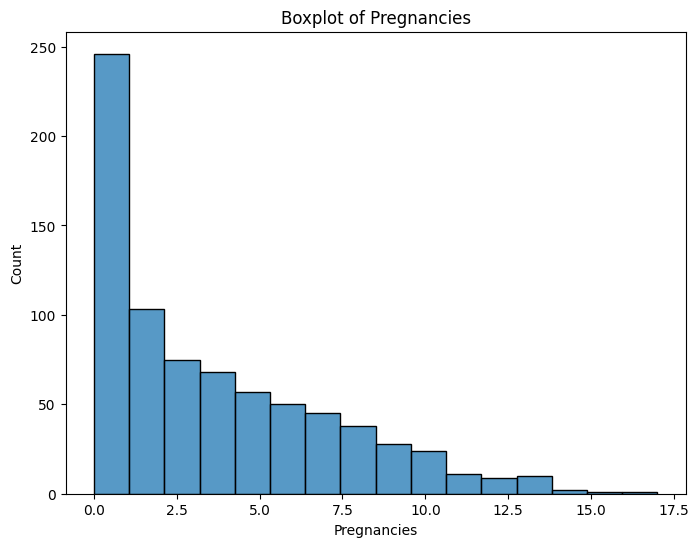

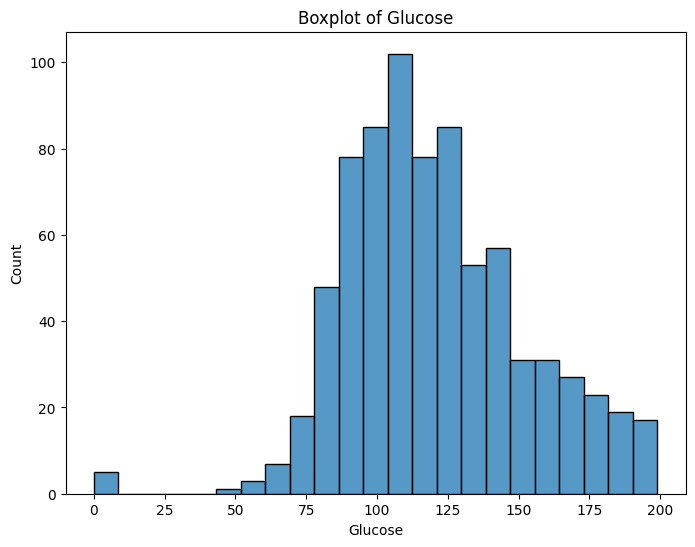

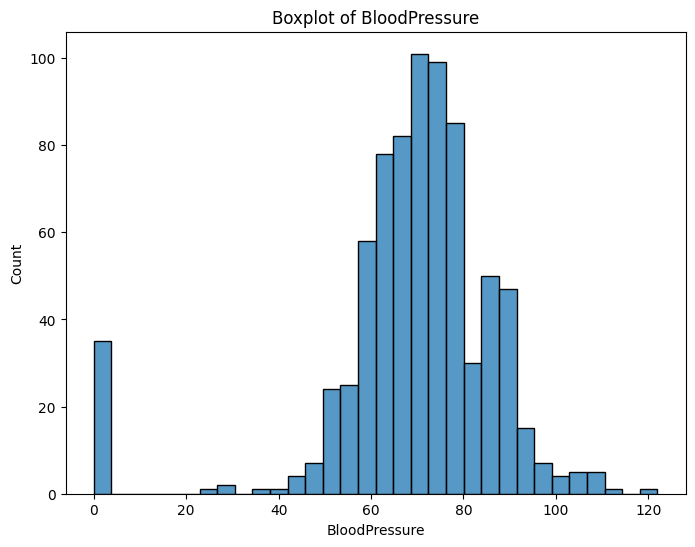

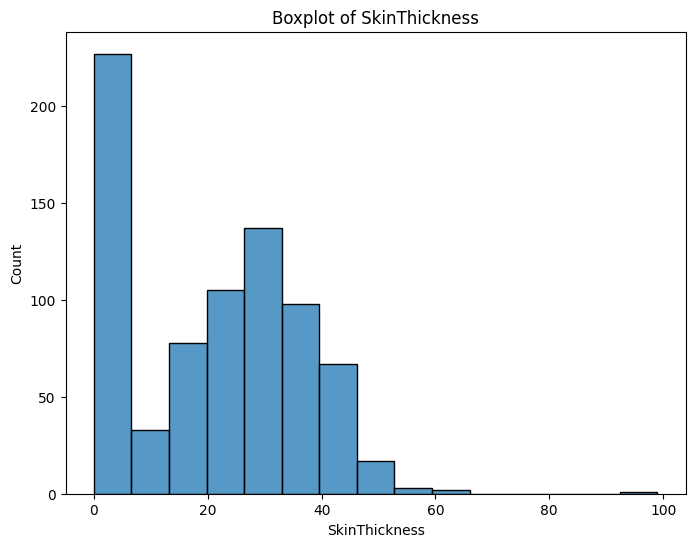

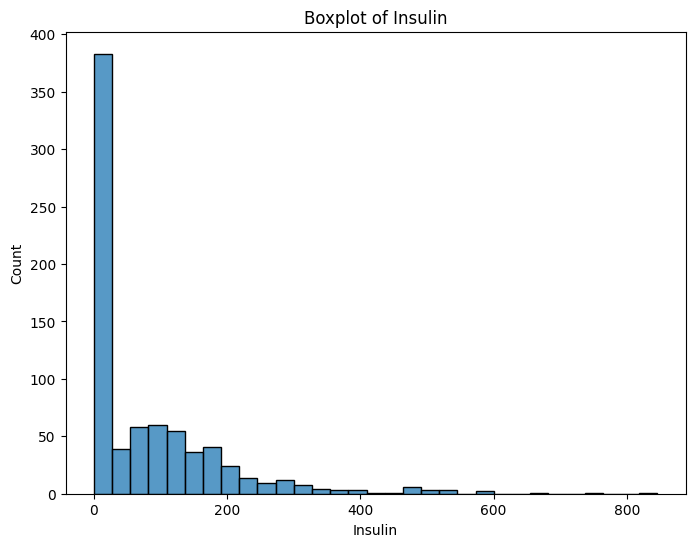

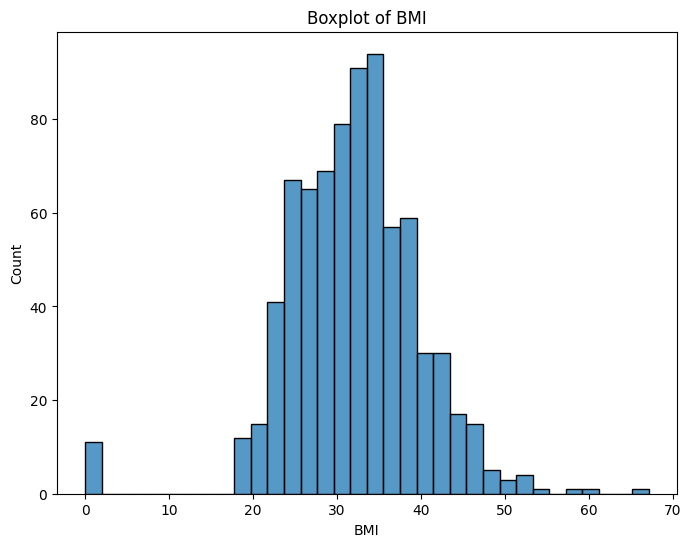

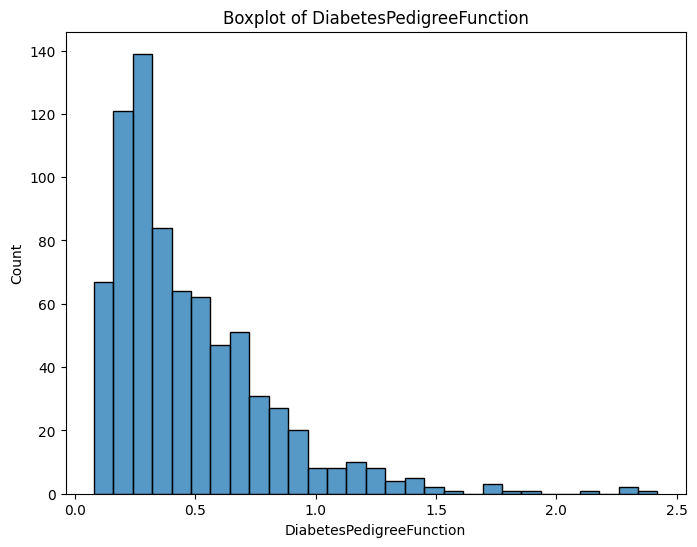

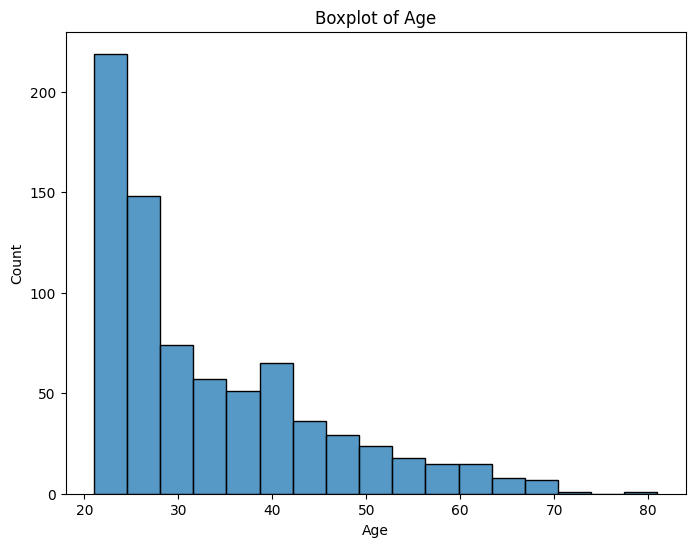

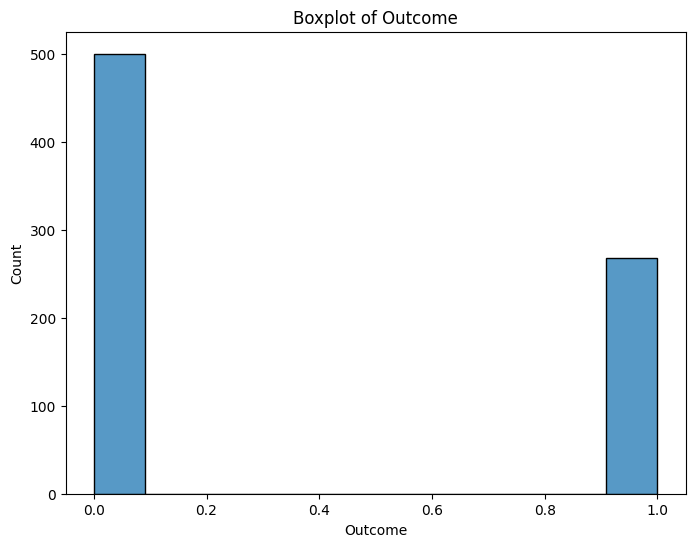

In [ ]:
for col in num:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Data Preprocesing

## scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
num= num = ['Glucose','Age','BloodPressure','SkinThickness','Insulin']

scaler = MinMaxScaler()
df[num] = scaler.fit_transform(df[num])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0.000000,33.6,0.627,0.483333,1
1,1,0.427136,0.540984,0.292929,0.000000,26.6,0.351,0.166667,0
2,8,0.919598,0.524590,0.000000,0.000000,23.3,0.672,0.183333,1
3,1,0.447236,0.540984,0.232323,0.111111,28.1,0.167,0.000000,0
4,0,0.688442,0.327869,0.353535,0.198582,43.1,2.288,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,10,0.507538,0.622951,0.484848,0.212766,32.9,0.171,0.700000,0
764,2,0.613065,0.573770,0.272727,0.000000,36.8,0.340,0.100000,0
765,5,0.608040,0.590164,0.232323,0.132388,26.2,0.245,0.150000,0
766,1,0.633166,0.491803,0.000000,0.000000,30.1,0.349,0.433333,1


## fitur & target

In [17]:
x = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

## spliting data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

# EDA

## Distribusi Kelas Sasaran ( Outcome)


<Axes: xlabel='Outcome', ylabel='count'>

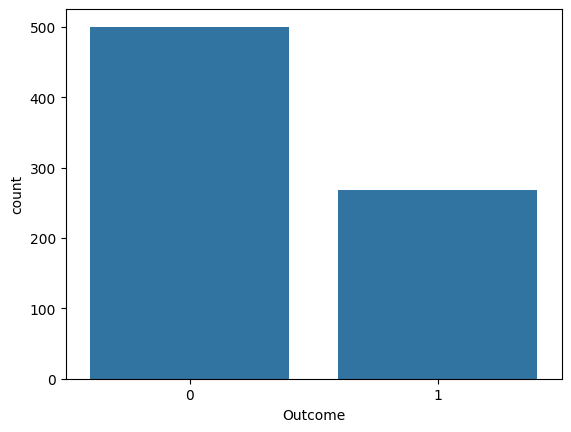

In [19]:
sns.countplot(x='Outcome', data=df)


## korelasi antar variabel

<Axes: >

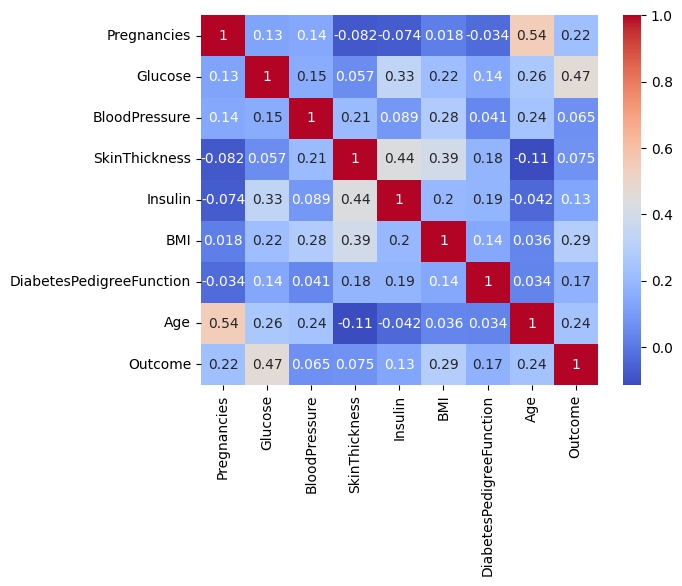

In [20]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# modeling

## svm

In [21]:
from sklearn.svm import SVC
# Inisialisasi model SVM dengan kernel linear
svm = SVC(kernel='linear')

# Train model
svm.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = svm.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM: {accuracy * 100:.2f}%")
# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Menghitung precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

Akurasi SVM: 75.32%
F1-Score: 0.7364226682408501
Precision: 0.7502546473134708
Recall: 0.7532467532467533


## Naive bayes

In [22]:
# Inisialisasi model Naive Bayes (Gaussian)
nb = GaussianNB()

# Train model
nb.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = nb.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Naive Bayes: {accuracy * 100:.2f}%")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

# Menghitung precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")


Akurasi Naive Bayes: 77.27%
F1-Score: 0.77
Precision: 0.7675942327105117
Recall: 0.7727272727272727


## knn

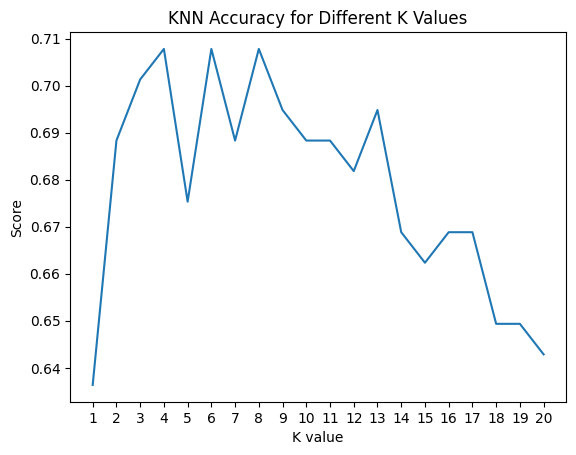

KNN best accuracy: 70.78%
F1-Score: 0.6685781750716816
Precision: 0.70491937534752
Recall: 0.7077922077922078


In [23]:
scoreListknn = []
best_knn_model = None

for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)

    # Menghitung akurasi dan menyimpan model terbaik
    score = KNclassifier.score(X_test, y_test)
    scoreListknn.append(score)

    # Simpan model jika akurasinya lebih baik
    if best_knn_model is None or score > best_knn_model.score(X_test, y_test):
        best_knn_model = KNclassifier

# Plotting
plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("KNN Accuracy for Different K Values")
plt.show()

KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc * 100))

# Menghitung F1-score menggunakan model terbaik
y_pred = best_knn_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Menghitung precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Membuat Sistem Prediktif

In [24]:
input_data = (2,264,70,21,176,26.9,0.671,40)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediksi = nb.predict(input_data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
  print('bukan penderita diabetes')
else:
  print('penderita diabetes')

[1]
penderita diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# simpan model

In [25]:
import pickle

In [26]:
filename = 'trained_model.sav'
pickle.dump(nb, open(filename, 'wb'))

In [27]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [28]:
input_data = (2,264,70,21,176,26.9,0.671,40)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediksi = loaded_model.predict(input_data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
  print('bukan penderita diabetes')
else:
  print('penderita diabetes')

[1]
penderita diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
